In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_df = pd.read_csv("data/city_data.csv")
ride_df = pd.read_csv("data/ride_data.csv")

# Read the City and Ride Data
city_df.head()
# Combine the data into a single dataset
ride_df.head()
# Display the data table for preview
ride_city=pd.merge(ride_df,city_df,on='city',how='left')
ride_city.drop_duplicates(['city'])


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789,33,Urban


## Bubble Plot of Ride Sharing Data

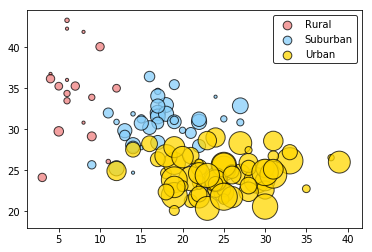

In [33]:
# Obtain the x and y coordinates for each of the three city types

#Total numbers of rides(per city)
cities=ride_city['city'].unique()
len(cities)

city_grouped= ride_city.groupby(['city'])
city_grouped
average_fare= city_grouped['fare'].mean()
average_fare

#ride count
ride_count= city_grouped['ride_id'].count()
ride_count
driver_count=city_grouped['driver_count'].mean()

city_type= city_df.set_index('city')['type']

citytype_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": average_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type})
citytype_info.sort_values('Number of Drivers', ascending = False)
    
# Build the scatter plots for each city types
rural = citytype_info[citytype_info['Type of City'] == 'Rural']
suburban = citytype_info[citytype_info['Type of City'] == 'Suburban']
urban = citytype_info[citytype_info['Type of City'] == 'Urban']

color_scheme = {'Light Coral':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Gold':'#F08080'}
city_color = {'Urban': color_scheme['Light Coral'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Gold']}

# Incorporate the other graph properties
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, 
            color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, 
            color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, 
            color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)


# Create a legend

# Incorporate a text label regarding circle size
plt.suptitle=('Pyber Ride Sharing Data (2016)')
plt.xlabel=('Total Number of Rides(Per City)')
plt.ylabel=('Average Fare ($)')

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]


# Save Figure
fig1=plt.savefig("data/fig1")

In [20]:
# Show plot
plt.show()

## Total Fares by City Type

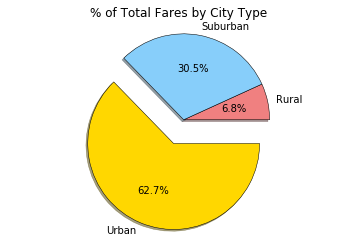

<Figure size 432x288 with 0 Axes>

In [35]:
#
city_type= ride_city.groupby('type')['type', 'fare', 'ride_id', 'driver_count']
sum_fare= city_type.sum()['fare']
sum_fare
labels= sum_fare.index

colors = [city_color[n] for n in labels]
explode = [0 , 0, .3]
plt.pie(sum_fare, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()
plt.savefig("data/fig2")

In [32]:
#save figure


<Figure size 432x288 with 0 Axes>

## Total Rides by City Type

In [31]:
# Calculate Ride Percents
total_rides=city_type.count()['ride_id']
total_rides
labels_rides=total_rides.index

# Build Pie Chart
colors = [city_color[n] for n in labels]
explode = [0 , 0, .3]
plt.pie(total_rides, colors = colors, explode = explode, labels = labels_rides, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

# Save Figure
fig3=plt.savefig("data/fig3")

IndexError: invalid index to scalar variable.

## Total Drivers by City Type

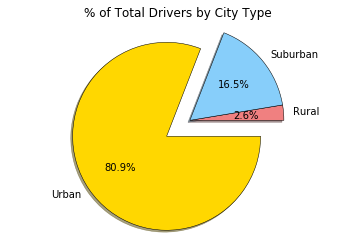

<Figure size 432x288 with 0 Axes>

In [30]:
# Calculate Driver Percents
total_drivers=city_df.groupby('type').sum()['driver_count']
total_drivers
labels_drivers=total_drivers.index


# Build Pie Charts
colors = [city_color[n] for n in labels]
explode = [0 , 0, .3]
plt.pie(total_drivers, colors = colors, explode = explode, labels = labels_drivers, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()


# Save Figure

fig4=plt.savefig("data/fig4")


In [25]:
# Show Figure
plt.show()